In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymysql
import copy
from obspy import read

In [3]:
st = read("C:\\Users\\OdeAl\\Desktop\\koeri_fdsnws.mseed")

In [5]:
print(st)

15 Trace(s) in Stream:
KO.ADVT..HHE | 2015-04-27T01:59:59.970000Z - 2015-04-27T02:15:02.570000Z | 100.0 Hz, 90261 samples
KO.ADVT..HHN | 2015-04-27T01:59:56.070000Z - 2015-04-27T02:15:01.420000Z | 100.0 Hz, 90536 samples
KO.ADVT..HHZ | 2015-04-27T01:59:59.330000Z - 2015-04-27T02:15:02.720000Z | 100.0 Hz, 90340 samples
KO.AFSR..BHE | 2015-04-27T01:59:52.520000Z - 2015-04-27T02:15:03.060000Z | 50.0 Hz, 45528 samples
KO.AFSR..BHN | 2015-04-27T01:59:59.620000Z - 2015-04-27T02:15:05.380000Z | 50.0 Hz, 45289 samples
KO.AFSR..BHZ | 2015-04-27T01:59:58.360000Z - 2015-04-27T02:15:05.180000Z | 50.0 Hz, 45342 samples
KO.AGRB..HHE | 2015-04-27T01:59:59.490000Z - 2015-04-27T02:12:51.990000Z | 100.0 Hz, 77251 samples
KO.AGRB..HHE | 2015-04-27T02:12:58.000000Z - 2015-04-27T02:13:02.990000Z | 100.0 Hz, 500 samples
KO.AGRB..HHE | 2015-04-27T02:12:52.000000Z - 2015-04-27T02:12:57.990000Z | 100.0 Hz, 600 samples
KO.AGRB..HHE | 2015-04-27T02:13:03.000000Z - 2015-04-27T02:15:01.820000Z | 100.0 Hz, 11883 sa

In [6]:
print(st[0].stats)

         network: KO
         station: ADVT
        location: 
         channel: HHE
       starttime: 2015-04-27T01:59:59.970000Z
         endtime: 2015-04-27T02:15:02.570000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 90261
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 344, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 1215488})


In [7]:
print(st[0].data)

[-8796 -8951 -8895 ..., -8362 -8940 -8028]


In [9]:
for k, v in sorted(st[0].stats.mseed.items()):
    print("'%s': %s" % (k, str(v)))

'byteorder': >
'dataquality': D
'encoding': STEIM2
'filesize': 1215488
'number_of_records': 344
'record_length': 512


In [10]:
st[0]

KO.ADVT..HHE | 2015-04-27T01:59:59.970000Z - 2015-04-27T02:15:02.570000Z | 100.0 Hz, 90261 samples

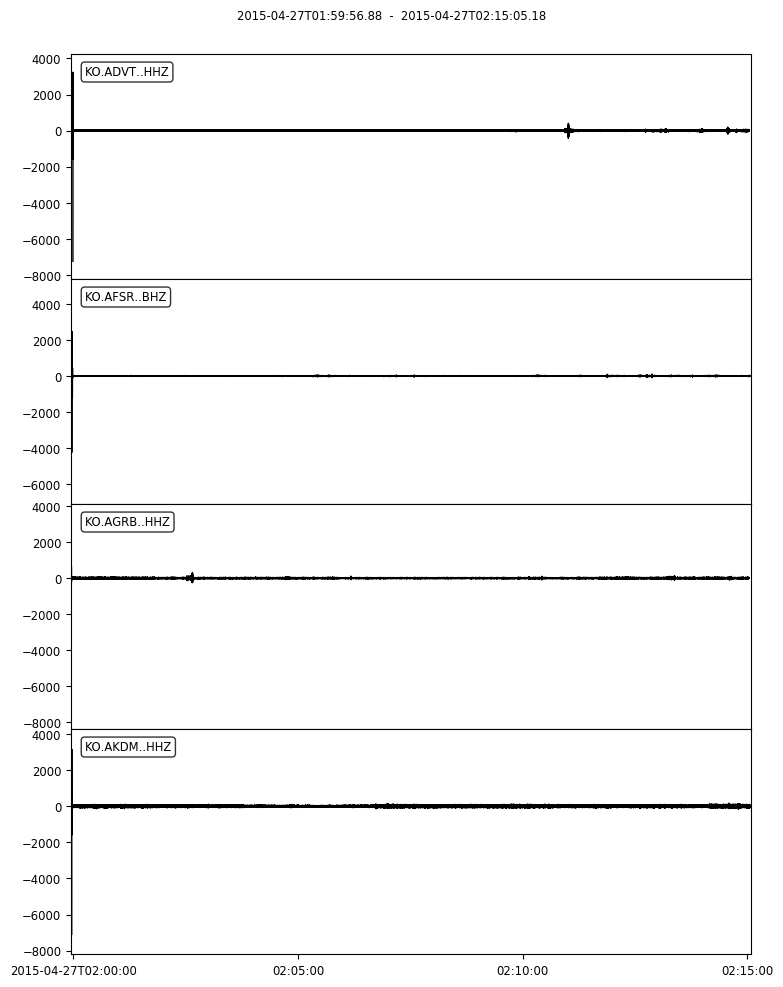

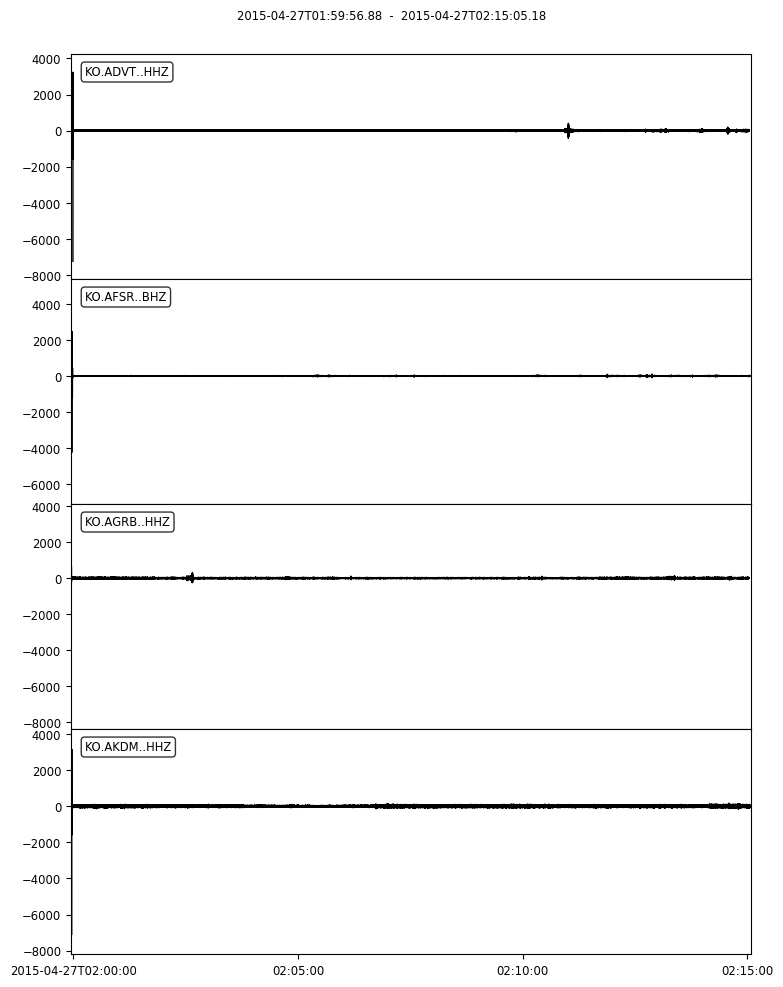

In [11]:
st.filter(type='highpass', freq=3.0)
st = st.select(component='Z')
st.plot()

In [13]:
st[0].data

array([-7243.27455162, -3687.41132085, -1017.88919411, ...,    53.18088966,
          42.9524968 ,    11.46308436])

In [15]:
from obspy.clients.syngine import Client
client = Client()

In [19]:
from obspy.clients.fdsn.mass_downloader.domain import RectangularDomain
domain = RectangularDomain(minlatitude=36.1425, maxlatitude=38.3289,
                           minlongitude=26.8898, maxlongitude=33.1520)

In [20]:
domain

In [51]:
from obspy import UTCDateTime
from obspy.clients.fdsn.mass_downloader import Restrictions
restrict = Restrictions(
    starttime=UTCDateTime(2020, 6, 27),
    endtime=UTCDateTime(2020, 6, 29, 1),
    network=None, station=None, location=None, channel=None,
    reject_channels_with_gaps=True,
    minimum_length=0.9,
    minimum_interstation_distance_in_m=1000,
    channel_priorities=["HH[ZNE]", "BH[ZNE]"],
    location_priorities=["", "00", "01"])

In [52]:
mseed_storage = ("C:\\Users\\OdeAl\\Desktop\\dene2/{boun}/"
                 "{all}.{marmaris}.{202027}.{202028}")

In [35]:
stationxml_storage = "C:\\Users\\OdeAl\\Desktop\\dene2\\boun.xml"

In [53]:
import obspy
from obspy.clients.fdsn.mass_downloader import RectangularDomain, \
    Restrictions, MassDownloader
mdl = MassDownloader()  
mdl.download(domain, restrict, 
             threads_per_client=3, mseed_storage=mseed_storage,
             stationxml_storage=stationxml_storage)

[2020-06-30 09:32:22,734] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for BGR, EMSC, ETH, GEONET, GFZ, ICGC, INGV, IPGP, ISC, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, SCEDC, TEXNET, UIB-NORSAR, USGS, USP, ORFEUS, IRIS.
[2020-06-30 09:32:22,745] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'EMSC' as it does not have 'dataselect' and/or 'station' services.
[2020-06-30 09:32:22,761] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'USGS' as it does not have 'dataselect' and/or 'station' services.
[2020-06-30 09:32:22,762] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'ISC' as it does not have 'dataselect' and/or 'station' services.
[2020-06-30 09:32:22,964] - obspy.clients.fdsn.mass_downloader - WARNING: Failed to initialize client 'ORFEUS'.
[2020-06-30 09:32:43,862] - obspy.clients.fdsn.mass_downloader - WARNING: Failed to initialize client 'IPGP'.
[2020-06-30 09:32:43,863] - obspy.clients.fdsn.mass_downloade

{'BGR': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x22e302cdba8>,
 'ETH': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x22e3086c080>,
 'GEONET': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x22e3093a128>,
 'GFZ': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x22e308735f8>,
 'ICGC': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x22e2b7e9128>,
 'INGV': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x22e30879358>,
 'KNMI': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x22e308714e0>,
 'KOERI': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x22e3079bc88>,
 'LMU': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x22e2b755f60>,
 'NCEDC': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper

In [56]:
st = read("C:\\Users\\OdeAl\\Desktop\\dene2\\{boun}\\{all}.{marmaris}.{202027}.{202028}\\GE.ISP.00.BHE__20200627T000000Z__20200629T010000Z.mseed")

In [57]:
st

1 Trace(s) in Stream:
GE.ISP.00.BHE | 2020-06-26T23:59:59.800000Z - 2020-06-29T01:00:02.000000Z | 20.0 Hz, 3528045 samples

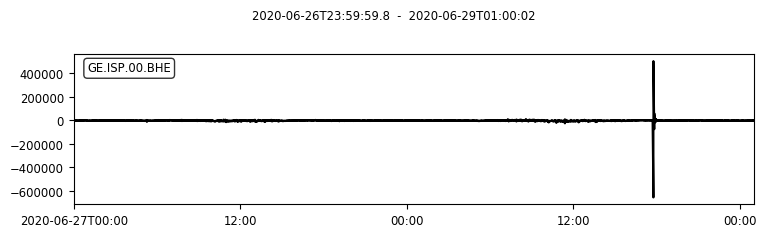

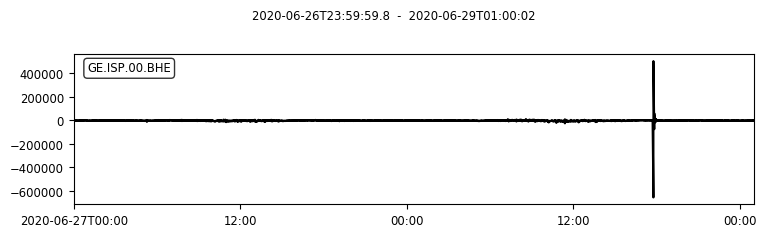

In [58]:
st.plot()

In [73]:
import glob
path = r'C:\\Users\\OdeAl\\Desktop\\dene2\\{boun}\\{all}.{marmaris}.{202027}.{202028}\\' # use your path
all_files = glob.glob(path + "\\*.mseed")

In [74]:
all_files

['C:\\\\Users\\\\OdeAl\\\\Desktop\\\\dene2\\\\{boun}\\\\{all}.{marmaris}.{202027}.{202028}\\GE.ISP.00.BHE__20200627T000000Z__20200629T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\dene2\\\\{boun}\\\\{all}.{marmaris}.{202027}.{202028}\\GE.ISP.00.BHN__20200627T000000Z__20200629T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\dene2\\\\{boun}\\\\{all}.{marmaris}.{202027}.{202028}\\GE.ISP.00.BHZ__20200627T000000Z__20200629T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\dene2\\\\{boun}\\\\{all}.{marmaris}.{202027}.{202028}\\HL.ARG..HHE__20200627T000000Z__20200629T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\dene2\\\\{boun}\\\\{all}.{marmaris}.{202027}.{202028}\\HL.ARG..HHN__20200627T000000Z__20200629T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\dene2\\\\{boun}\\\\{all}.{marmaris}.{202027}.{202028}\\HL.ARG..HHZ__20200627T000000Z__20200629T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\dene2\\\\{boun}\\\\{all}.{marmaris}.{202027}.{202028}\\KO.ANTB..BHE__

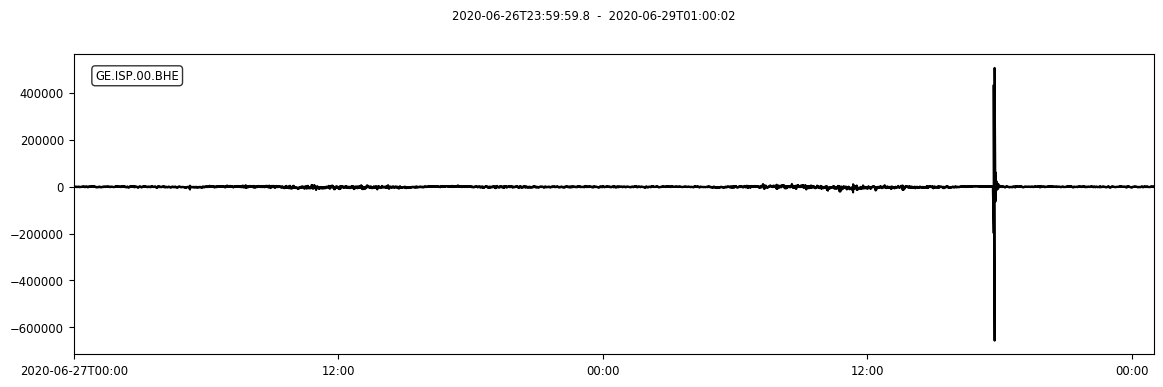

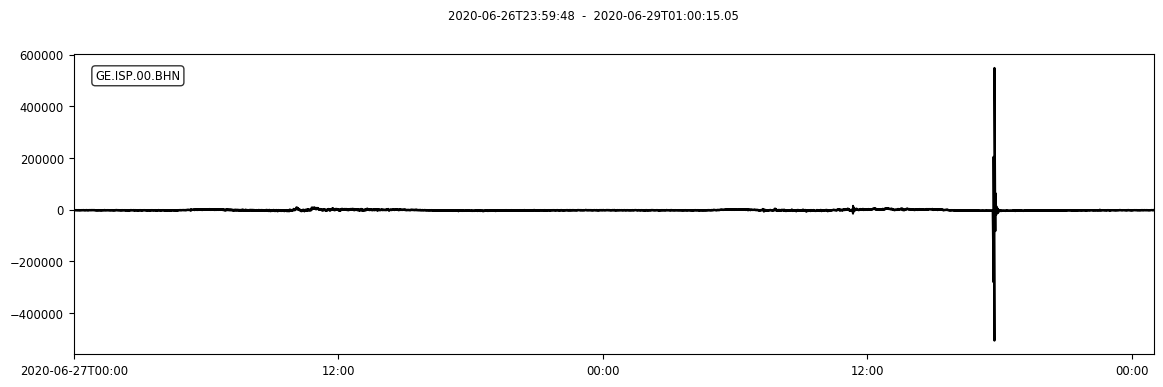

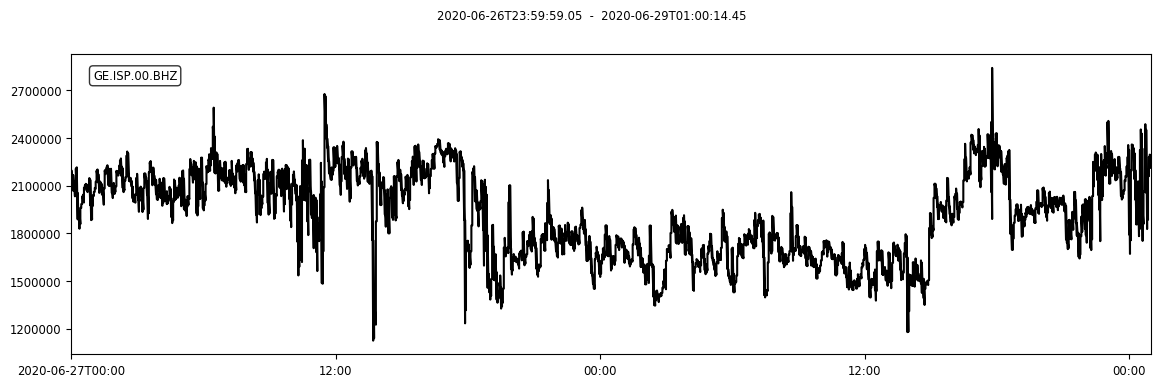

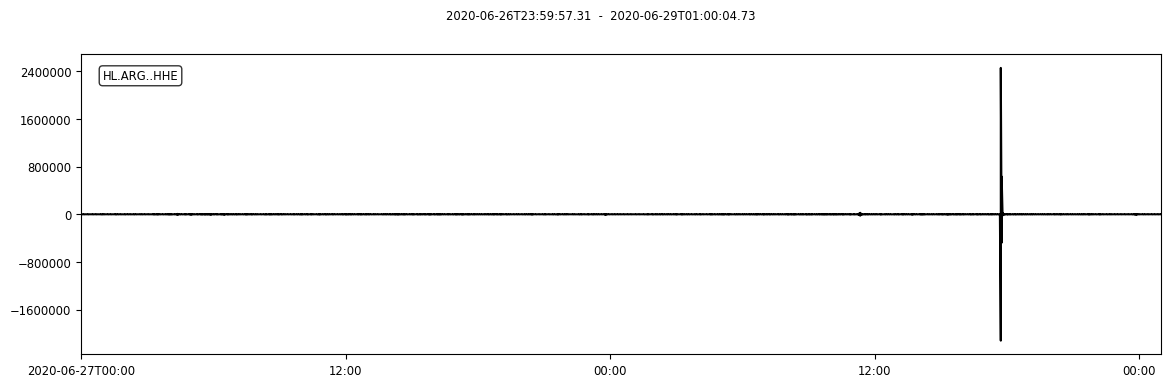

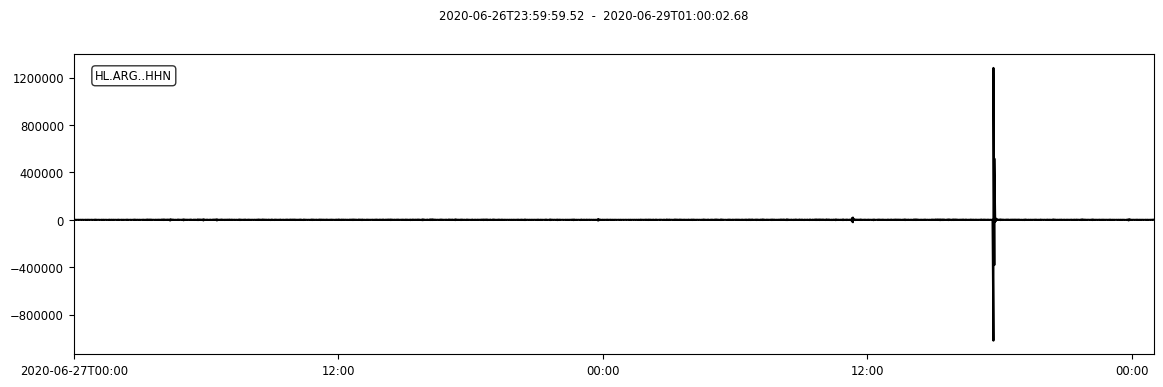

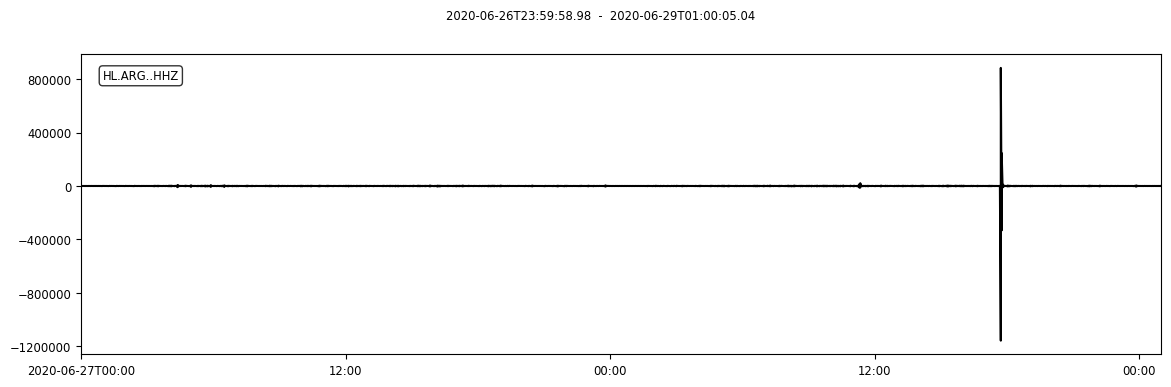

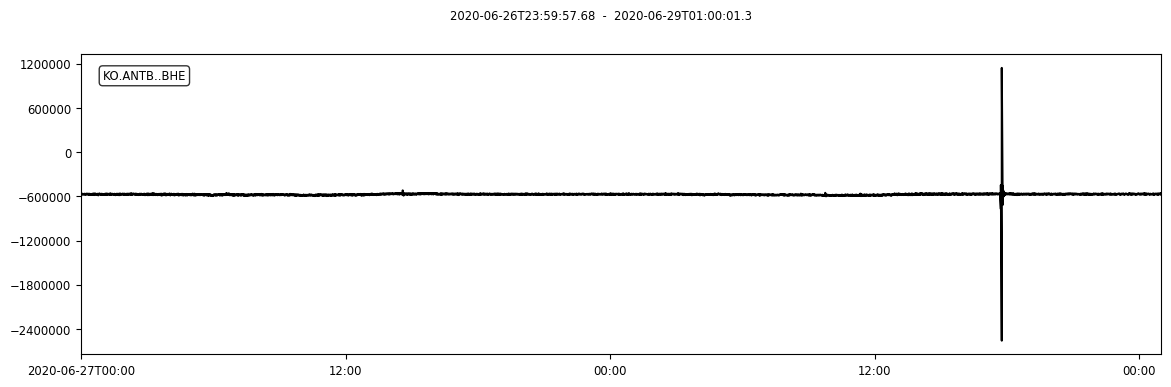

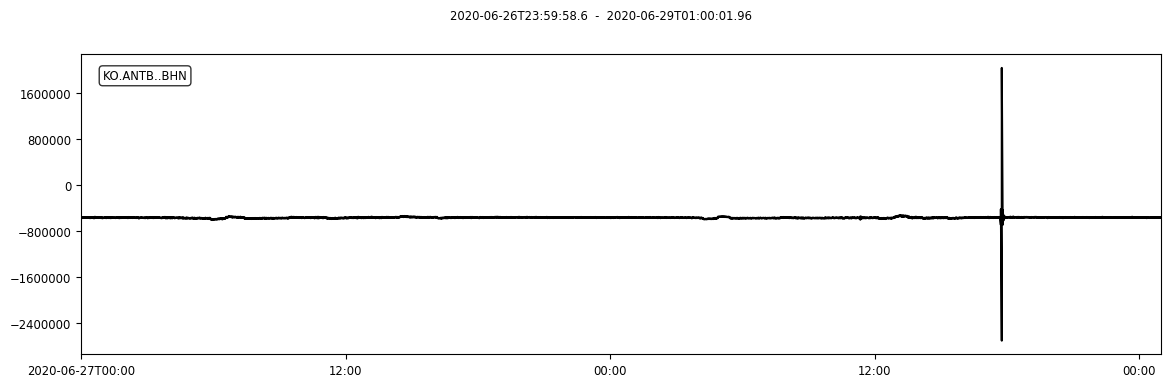

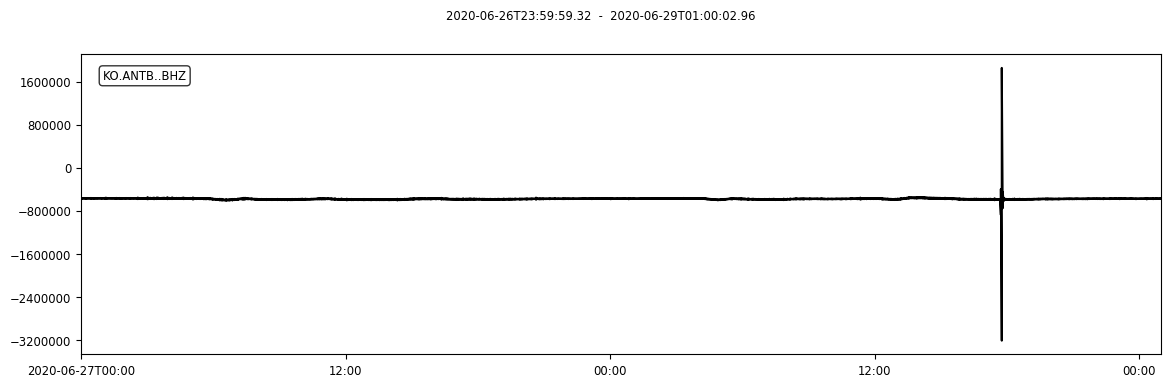

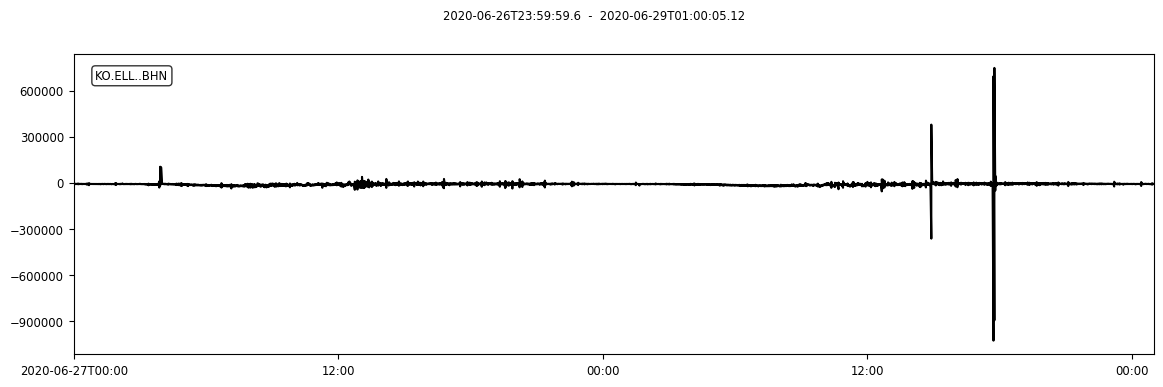

In [75]:
st = {}
for doc in all_files:
    st = read(doc)
    st.plot(size=(1200, 400))

In [67]:
path = r'C:\\Users\\OdeAl\\Desktop\\{dene}\{boun}\{all}.{marmaris}.{202027}.{202028}.mseed\\' # use your path
all_files = glob.glob(path + "\\*.mseed")

In [68]:
all_files

['C:\\\\Users\\\\OdeAl\\\\Desktop\\\\{dene}\\{boun}\\{all}.{marmaris}.{202027}.{202028}.mseed\\GE.ISP.00.BHE__20200627T000000Z__20200628T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\{dene}\\{boun}\\{all}.{marmaris}.{202027}.{202028}.mseed\\GE.ISP.00.BHN__20200627T000000Z__20200628T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\{dene}\\{boun}\\{all}.{marmaris}.{202027}.{202028}.mseed\\GE.ISP.00.BHZ__20200627T000000Z__20200628T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\{dene}\\{boun}\\{all}.{marmaris}.{202027}.{202028}.mseed\\HL.ARG..HHE__20200627T000000Z__20200628T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\{dene}\\{boun}\\{all}.{marmaris}.{202027}.{202028}.mseed\\HL.ARG..HHN__20200627T000000Z__20200628T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\{dene}\\{boun}\\{all}.{marmaris}.{202027}.{202028}.mseed\\HL.ARG..HHZ__20200627T000000Z__20200628T010000Z.mseed',
 'C:\\\\Users\\\\OdeAl\\\\Desktop\\\\{dene}\\{boun}\\{all}.{marmaris}.{202027}.{202028}.

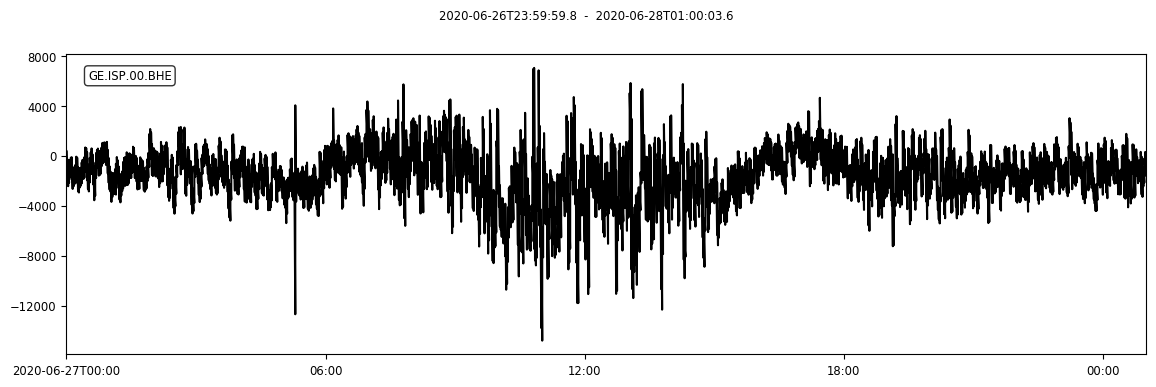

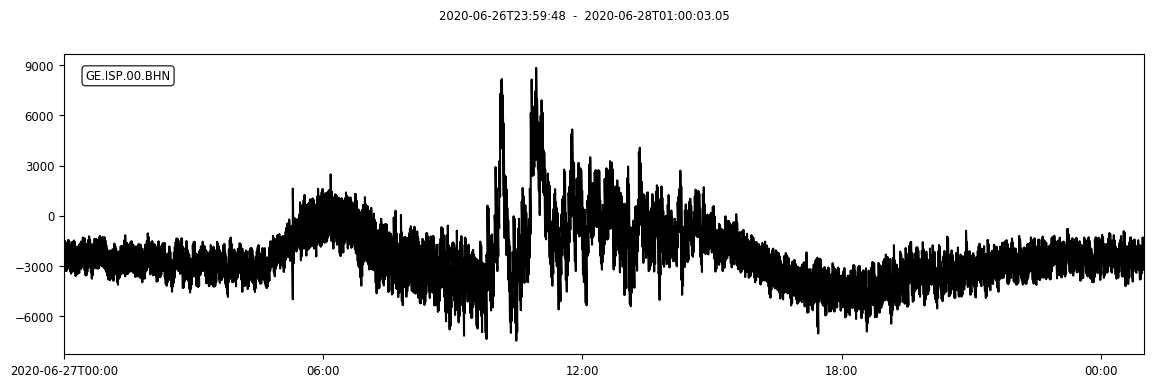

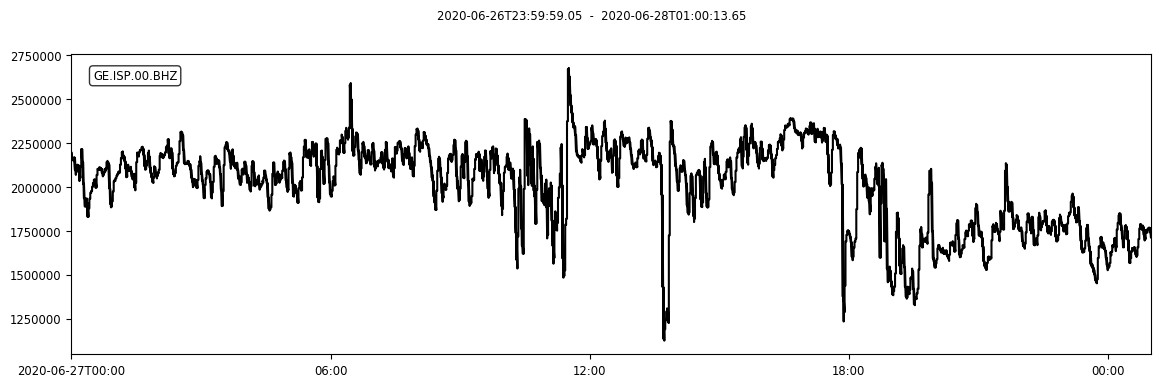

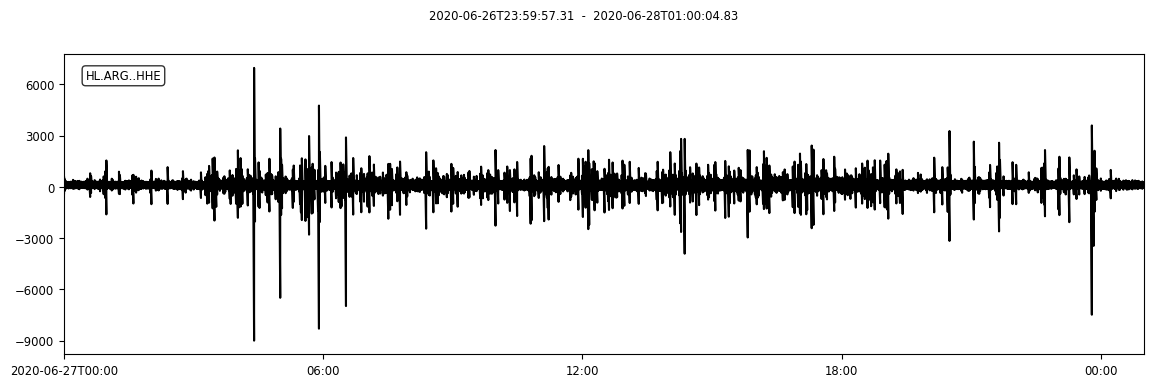

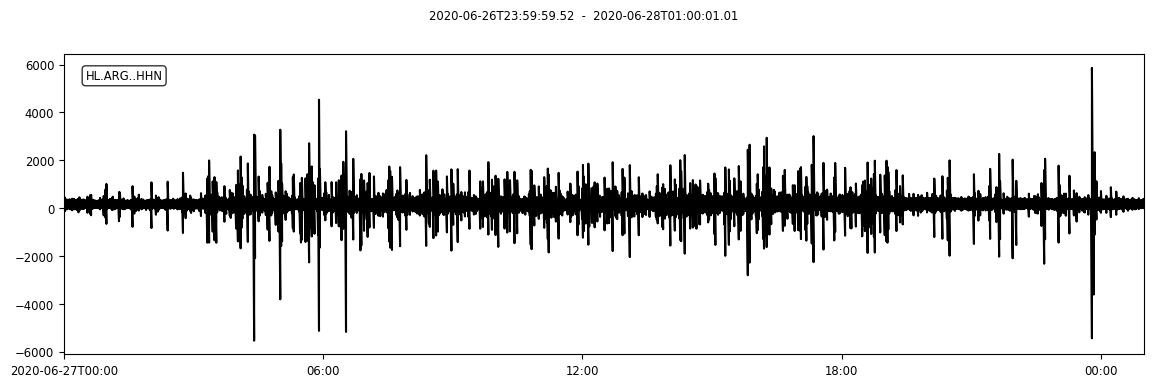

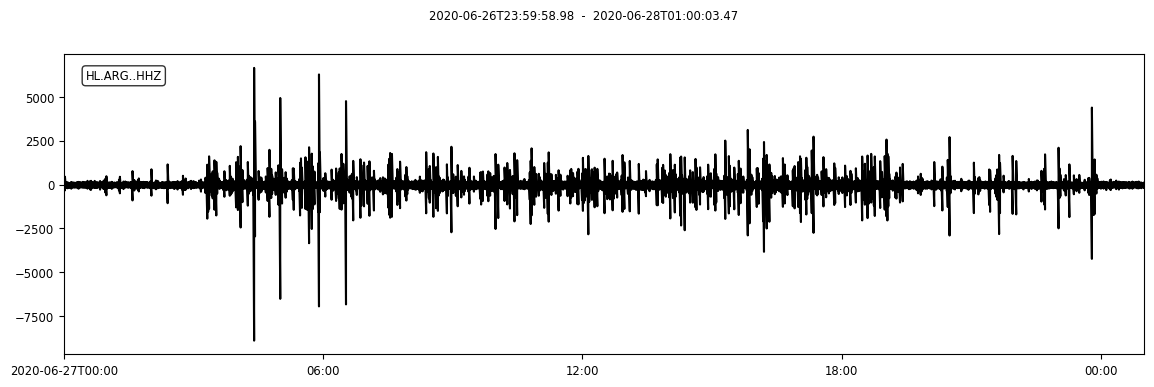

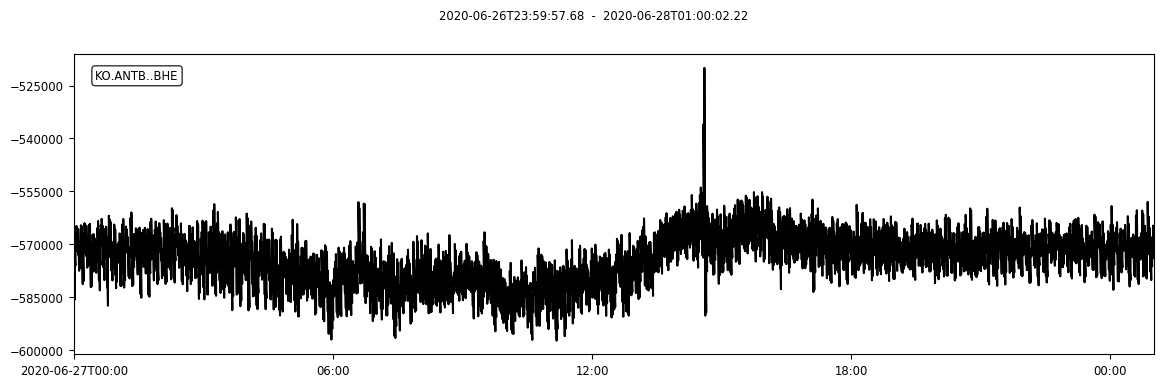

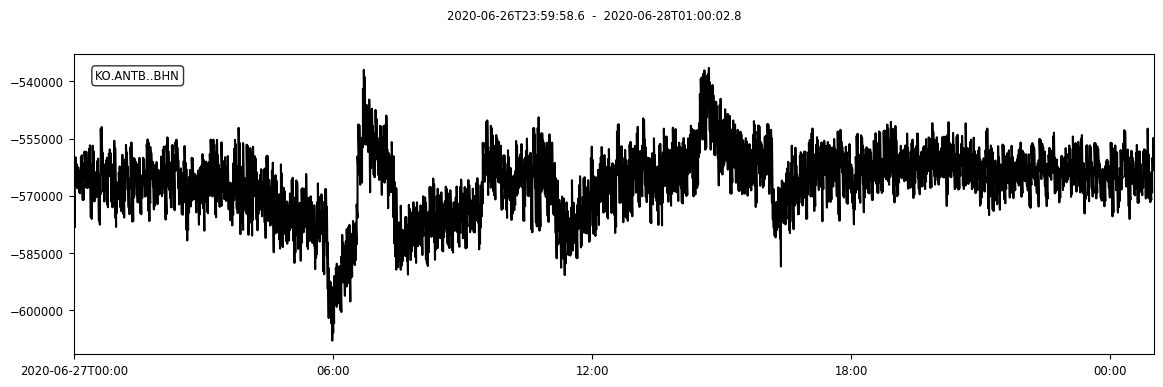

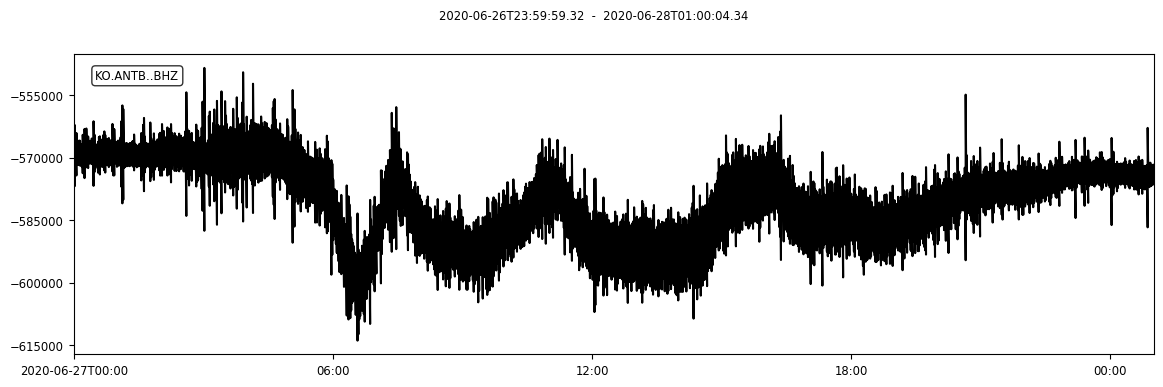

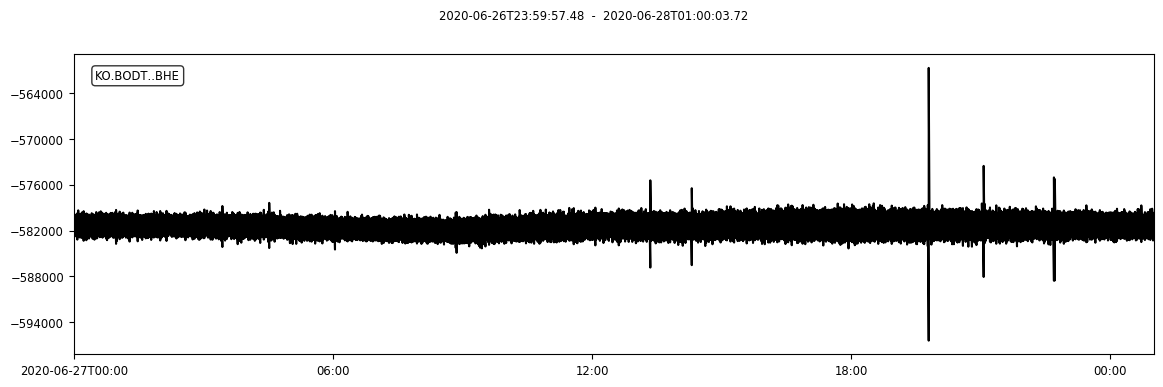

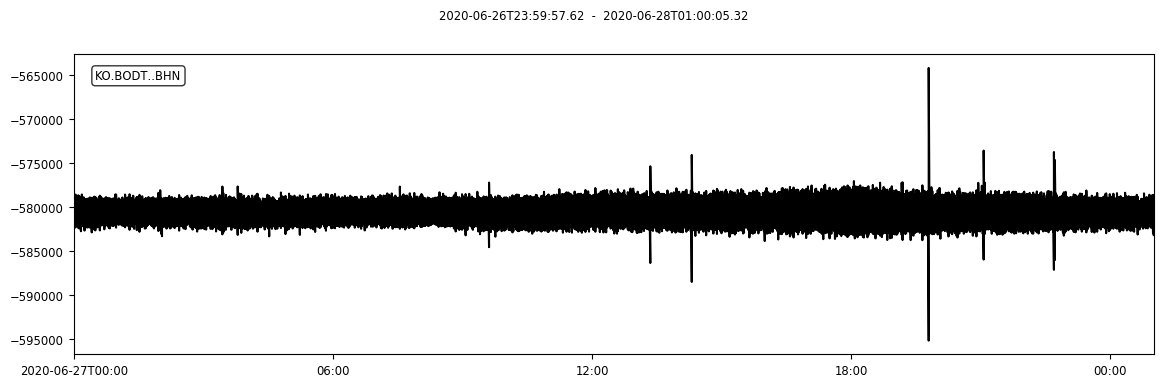

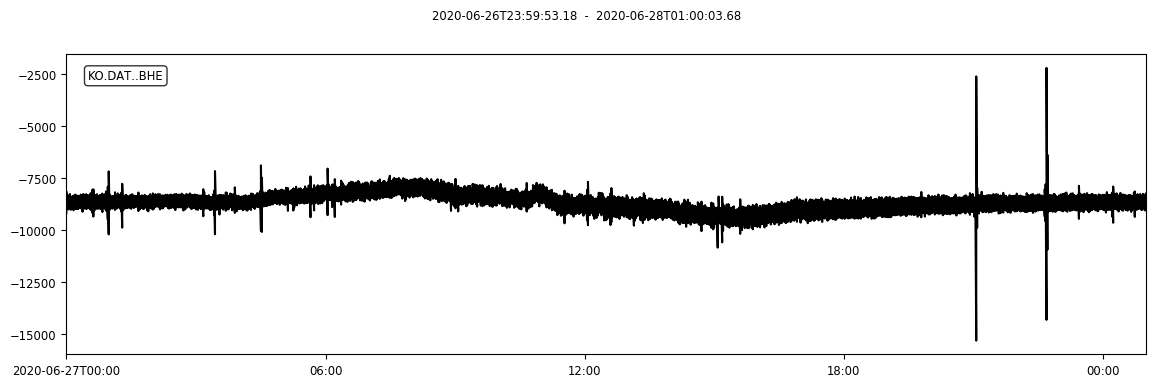

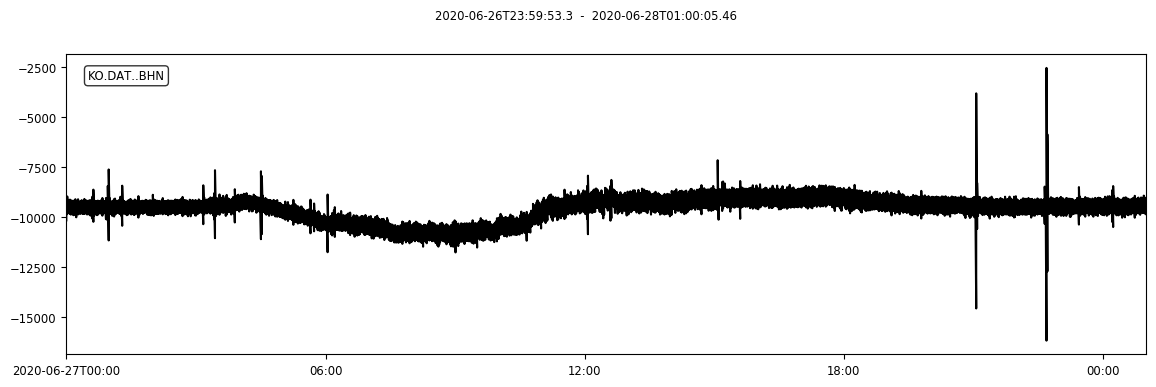

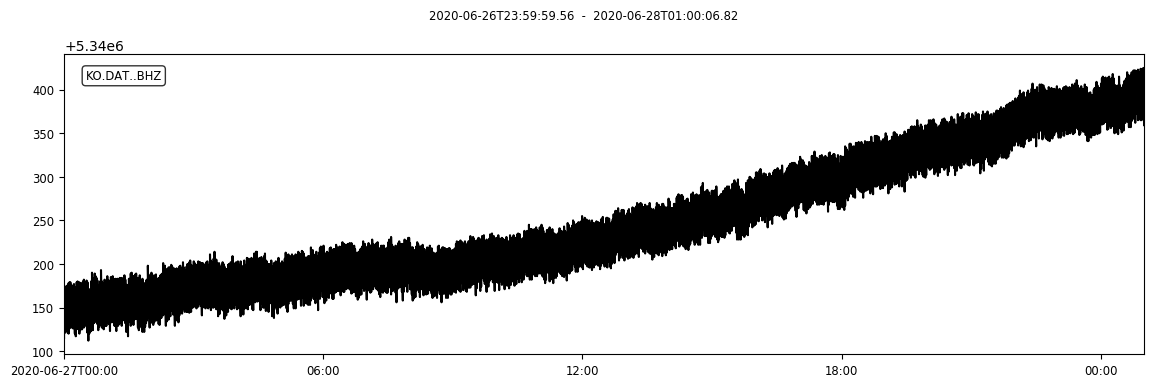

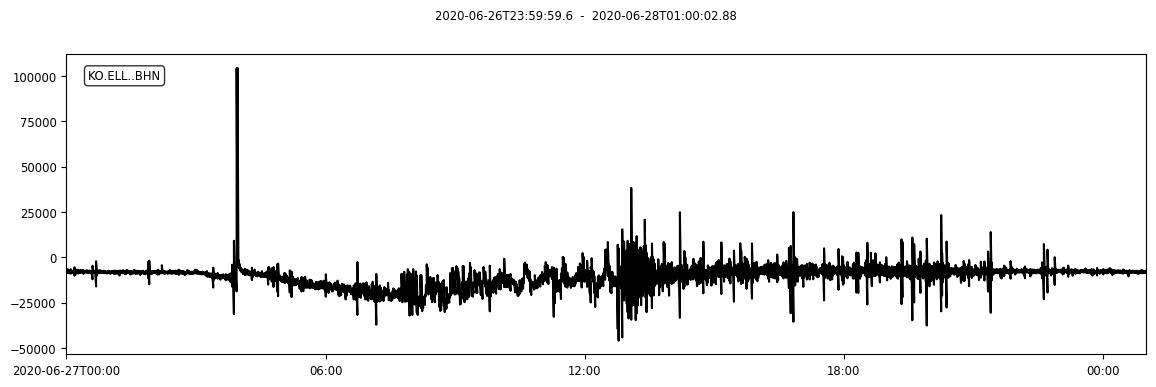

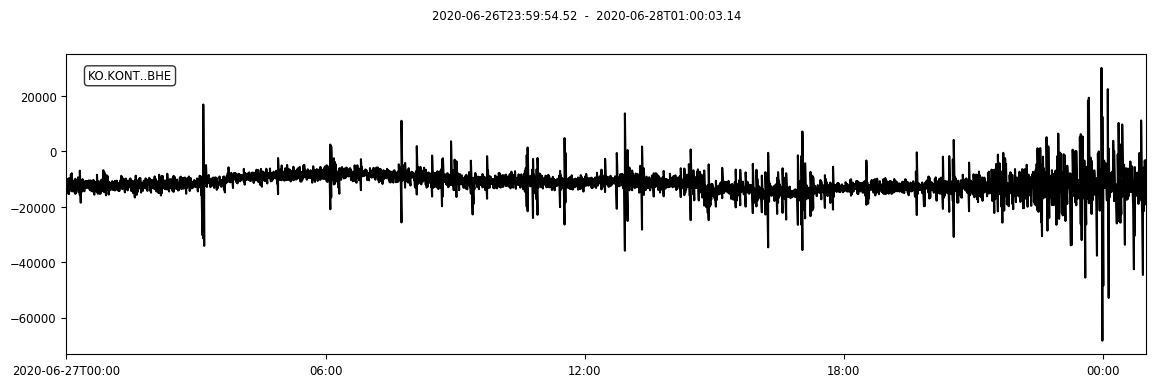

In [72]:
st = {}
for doc in all_files:
    st = read(doc)
    st.plot(size=(1200, 400))